In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [78]:
f = open('gold_hist.txt')
data = f.read()
f.close()

In [79]:
years = data.split('\n')[::2]
prices = [float (n.strip().replace('$', '').replace(',', '')) for n in data.split('\n')[1::2]]

In [80]:
df = pd.DataFrame({'year': years, 'price': prices})

In [81]:
df.head()

,year,price
0,2015,1060.00
1,1994,383.25
2,1973,106.48
3,2014,1199.25
4,1993,391.75


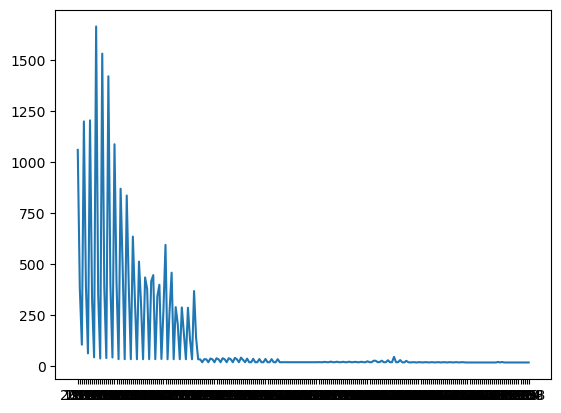

In [82]:
plt.plot(df.year, df.price)

# plot ugly as it is not sorted

In [83]:
df = df.sort_values(by = 'year')
df['year'] = df.year.astype('int')

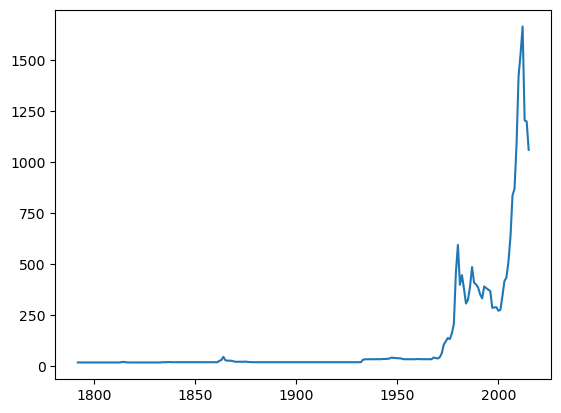

In [84]:
plt.plot(df.year, df.price)

In [85]:
# plot the data from 1972 onwards
# label the point representing the peak price

temp = df.loc[df.year >= 1972]

Text(2012, 1664.0, 'The peak price')

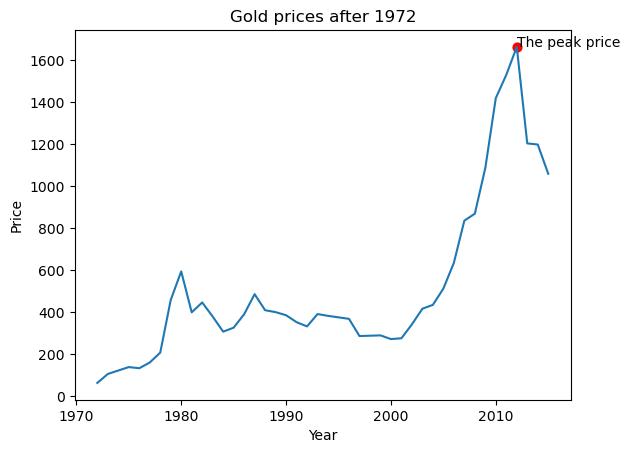

In [86]:
plt.title('Gold prices after 1972')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(temp.year, temp.price)

# labeling max point
yPeak = df.price.max()
xPeak = df.loc[df.price == yPeak, 'year'].values[0]

plt.scatter(xPeak, yPeak, s = 40, c = 'red')
plt.text(xPeak, yPeak, 'The peak price')

In [87]:
### Exercise

In [88]:
# read data from movies.csv

df = pd.read_csv('movies.csv')
df.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


(array([4.546e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.18000000e+02, 1.22155020e+09, 2.44310017e+09, 3.66465015e+09,
        4.88620013e+09, 6.10775011e+09, 7.32930009e+09, 8.55085007e+09,
        9.77240004e+09, 1.09939500e+10, 1.22155000e+10]),
 <BarContainer object of 10 artists>)

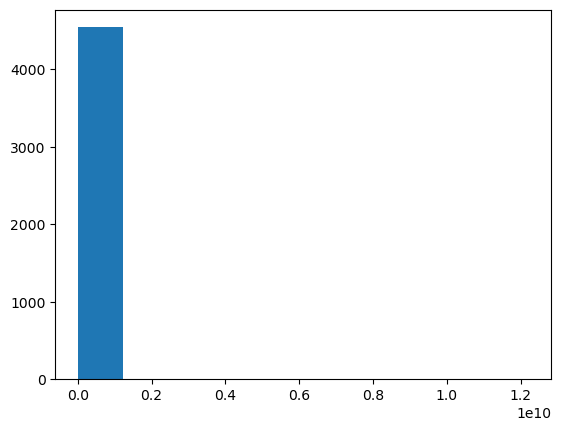

In [89]:
# create a histogram of the budget column
plt.hist(df.budget)

{'whiskers': [<matplotlib.lines.Line2D at 0x168f39e70>,
 'caps': [<matplotlib.lines.Line2D at 0x168f3a470>,
 'boxes': [<matplotlib.lines.Line2D at 0x168f39bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x168f3a950>],
 'fliers': [<matplotlib.lines.Line2D at 0x168f3ac50>],
 'means': []}

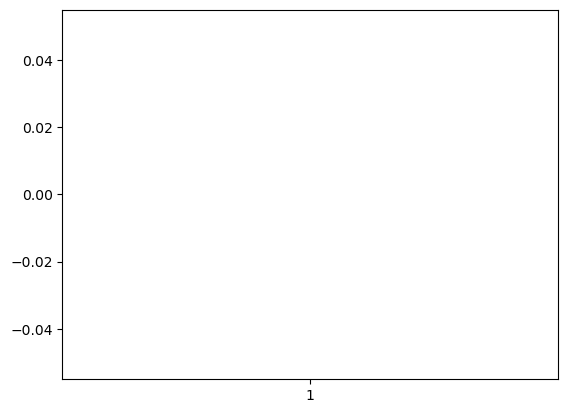

In [90]:
# since data is not really shown well on histogram (due to bins and x axis)
# do a boxplot 
plt.boxplot(df.budget)

In [91]:
# same issues, there are missing values affecting it

df = df.dropna()


{'whiskers': [<matplotlib.lines.Line2D at 0x168f8c9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x168f8ceb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168f8c6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x168f8d4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x168f8d7e0>],
 'means': []}

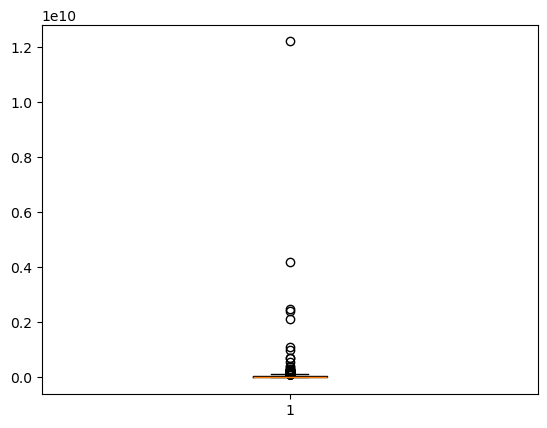

In [92]:
# different issue now, outlier skweing the data
plt.boxplot(df.budget)

{'whiskers': [<matplotlib.lines.Line2D at 0x1690147c0>,
 'caps': [<matplotlib.lines.Line2D at 0x169014dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1690144c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1690153c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x169015660>],
 'means': []}

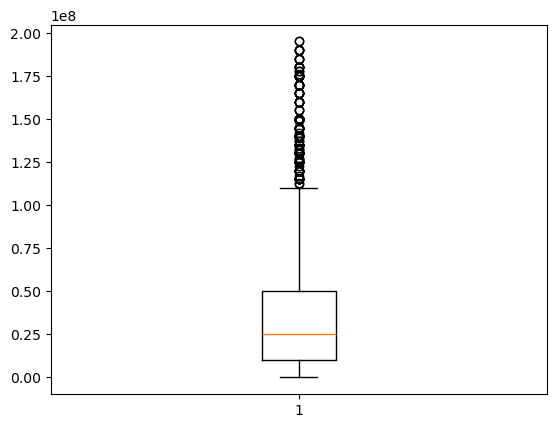

In [93]:
plt.boxplot(df.loc[df.budget<0.2e9, 'budget'])

(array([1550.,  920.,  471.,  293.,  153.,  104.,   67.,   74.,   35.,
          20.]),
 array([2.18000000e+02, 1.95001962e+07, 3.90001744e+07, 5.85001526e+07,
        7.80001308e+07, 9.75001090e+07, 1.17000087e+08, 1.36500065e+08,
        1.56000044e+08, 1.75500022e+08, 1.95000000e+08]),
 <BarContainer object of 10 artists>)

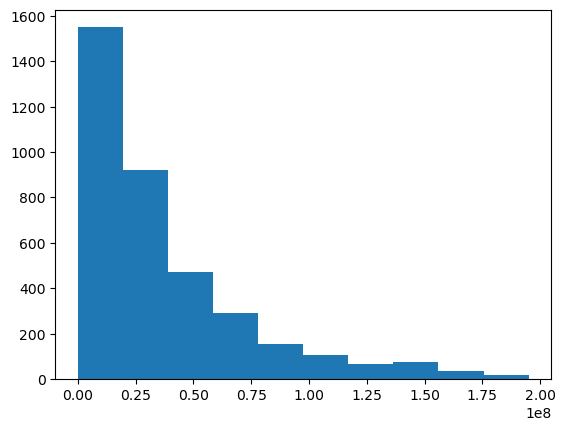

In [94]:
plt.hist(df.loc[df.budget<0.2e9, 'budget'])

In [95]:
# removing outliers helped visualize more, but cannot just remove arbitrarily
# should do it more systematically by comparing it to the mean/median

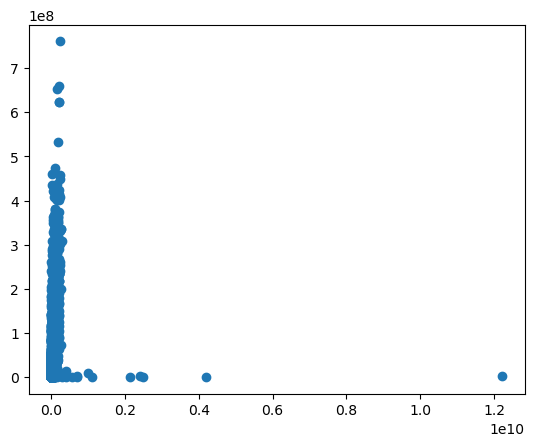

In [96]:
plt.scatter(df.budget, df.gross)

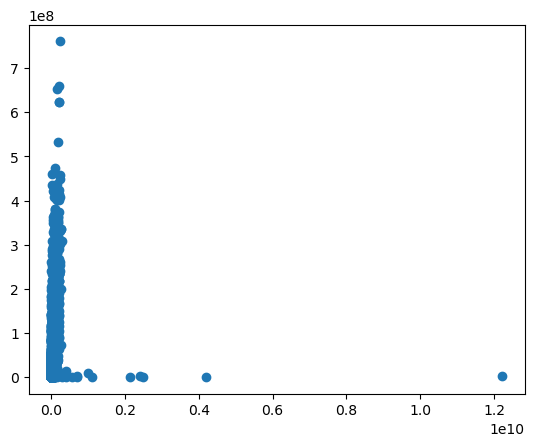

In [104]:
# now the systematic approach to outliers
mask = df[['gross', 'budget']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis = 1)
# the .all does it so that it is true only if both values are True in the mask

scatter_df = df[['budget', 'gross']]
temp = scatter_df[mask]
plt.scatter(scatter_df.budget, scatter_df.gross)

In [105]:
temp = df[['color', 'duration']]

<Axes: title={'center': 'duration'}, xlabel='color'>

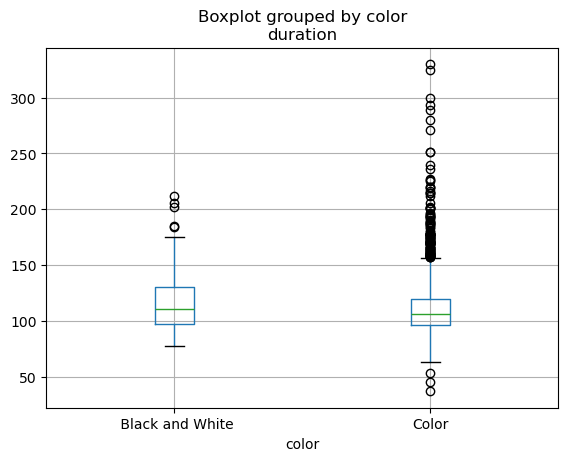

In [106]:
temp.boxplot(by = 'color', column = 'duration')

In [ ]:
# can also plot by doing


df.plot(kind = 'hist', x = '')
df.plot(kind = 'scatter', x = '', y = '')
df.boxplot(by = '', column = '')


"\ndf.plot(kind = 'hist', x = '')\ndf.plot(kind = 'scatter', x = '', y = '')\ndf.boxplot(by = '', column = '')\n"

In [108]:
### Seaborn

In [125]:
import seaborn as sns

# can set a style that all graphs will follow
sns.set_style('darkgrid')

In [126]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


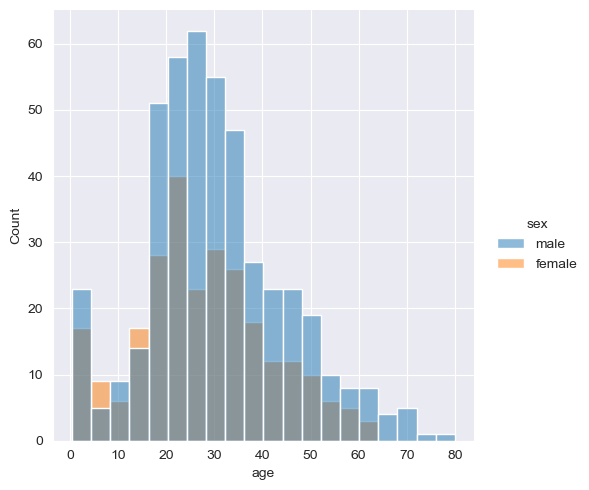

In [127]:
# sns.displot(data = df, x = 'age')

# hue adds another dimension, can compare more than one thing in the plot
# as seen below, comparing the age distribution by sex
sns.displot(data = df, x = 'age', hue = 'sex') 


<Axes: xlabel='deck', ylabel='count'>

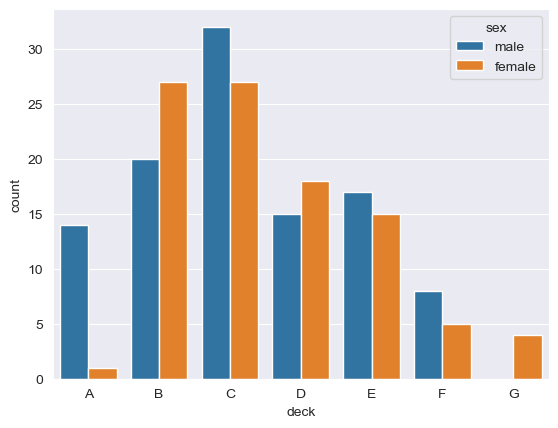

In [128]:
# countplot
# used mostly for categorical data
# frequencies of categorical attributes

# sns.countplot(data = df, x = 'deck')

# again can also use hue in this
sns.countplot(data = df, x = 'deck', hue = 'sex')

<Axes: xlabel='age', ylabel='Density'>

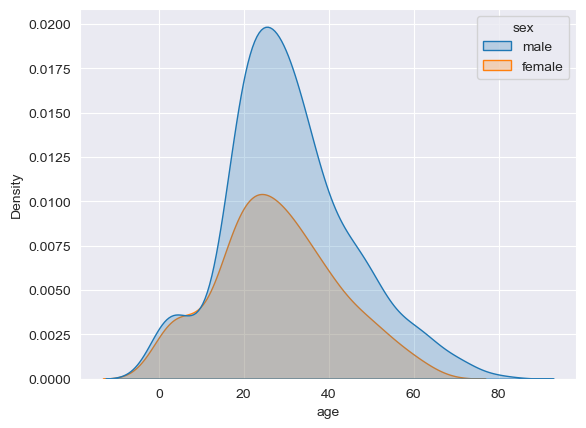

In [132]:
# kdeplot
# gives you the density of the values

# sns.kdeplot(data = df, x = 'age', fill = True)
sns.kdeplot(data = df, x = 'age', fill = True, hue = 'sex')

<Axes: xlabel='sex', ylabel='age'>

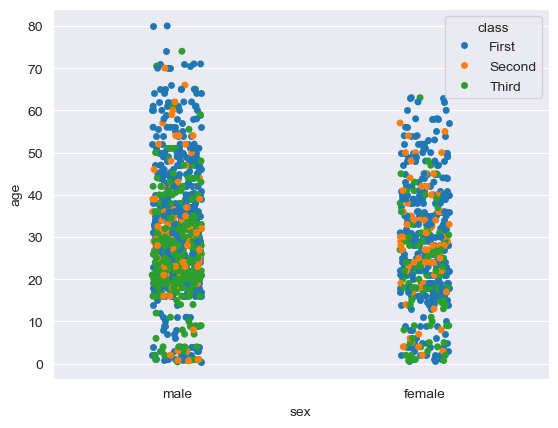

In [136]:
# stripplot
# special kind of scatterplot

sns.stripplot(data = df, x = 'sex', y = 'age')

# hue not too useful in this case, data overlaps a lot 
sns.stripplot(data = df, x = 'sex', y = 'age', hue = 'class')

<Axes: xlabel='sex', ylabel='age'>

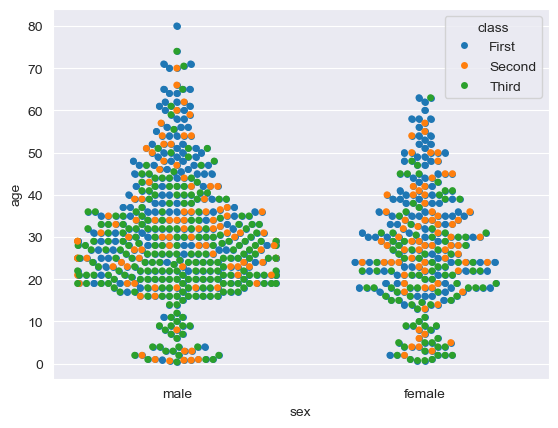

In [139]:
# swarmplot
# similar to stripplot, but shows density better by spreading instead of overlapping

sns.swarmplot(data = df, x = 'sex', y = 'age')
sns.swarmplot(data = df, x = 'sex', y = 'age', hue = 'class')

<Axes: xlabel='sex', ylabel='age'>

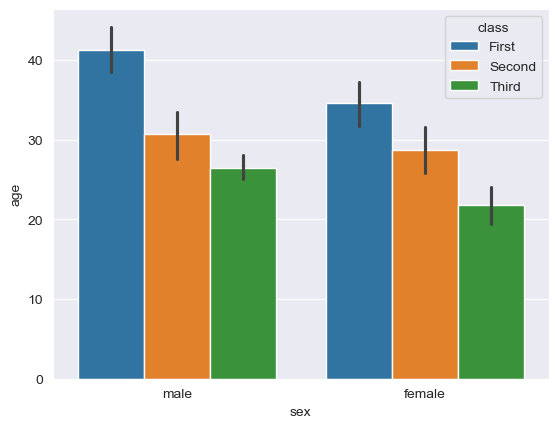

In [141]:
# barplot

sns.barplot(data = df, x = 'sex', y = 'age', hue = 'class')

<Axes: xlabel='sex', ylabel='age'>

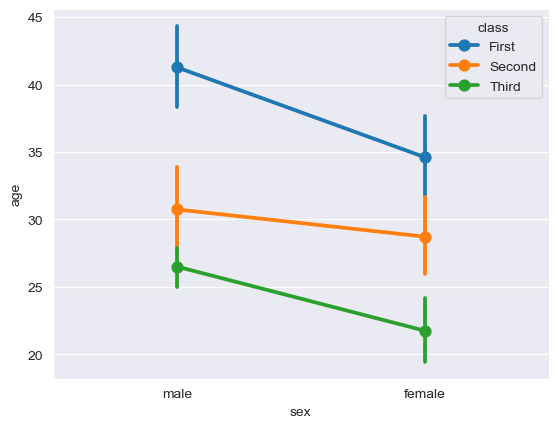

In [144]:
# pointplot
# similar to barplot, but just mean and std in this case

sns.pointplot(data = df, x = 'sex', y = 'age', hue = 'class')

<Axes: xlabel='age', ylabel='fare'>

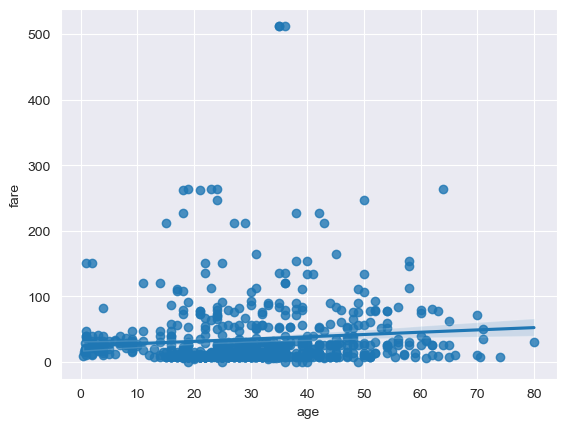

In [146]:
# regplot

sns.regplot(data = df, x = 'age', y = 'fare')
# cannot add hue in this case

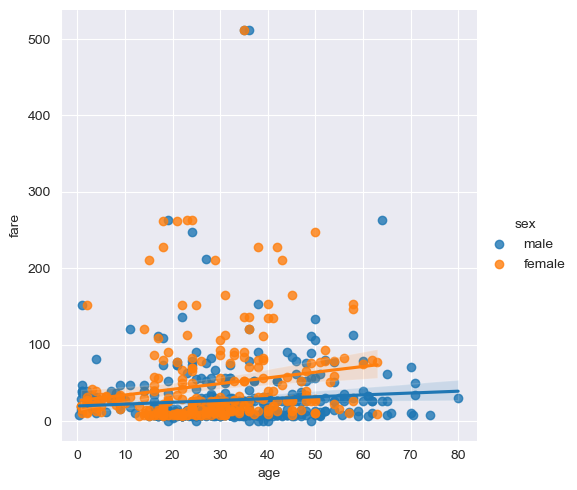

In [148]:
# lmplot
# similar to regplot but more advanced

sns.lmplot(data = df, x = 'age', y = 'fare', hue = 'sex')